# Importing Libraries

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

In [36]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

# Loading the Data

<h5>The adverstiting dataset captures sales revenue generated with respect to advertisement spends across multiple channles like radio, tv and newspaper.</h5>

In [37]:
# The code was removed by Watson Studio for sharing.

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [38]:
advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
Radio         200 non-null float64
Newspaper     200 non-null float64
Sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


# Relationship between Features and Response

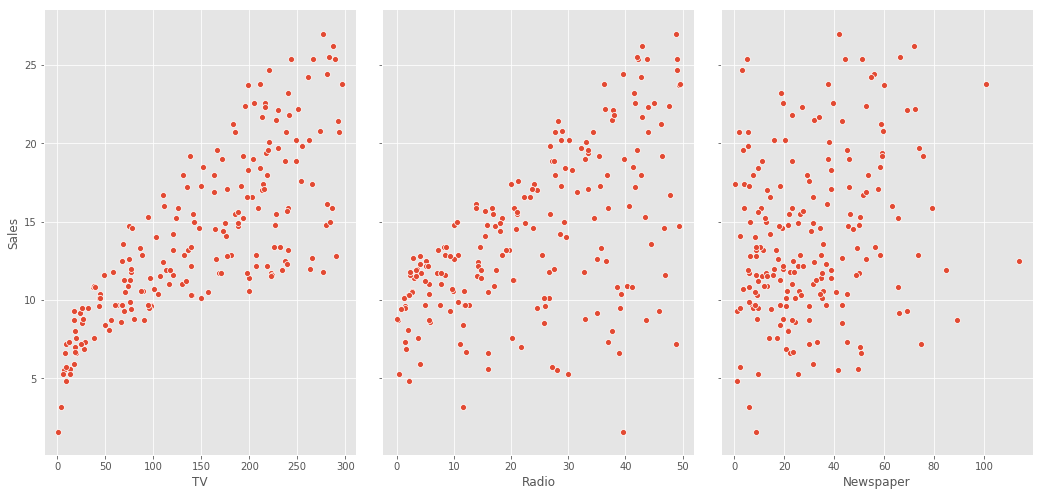

In [39]:
sns.pairplot(advert, x_vars=['TV','Radio','Newspaper'],y_vars='Sales', height=7, aspect=0.7)

# Multiple Linear Regression - Estimate the Coefficients

In [40]:
from sklearn.linear_model import LinearRegression 

In [41]:
X = advert[['TV','Radio','Newspaper']]
y = advert['Sales']

In [42]:
lin_model1 = LinearRegression()
lin_model1.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [43]:
coefficients = list(zip(['TV','Radio','Newspaper'],lin_model1.coef_))
print("The coeff are ",coefficients)
print("The intercept is ",lin_model1.intercept_)

The coeff are  [('TV', 0.04576464545539761), ('Radio', 0.18853001691820462), ('Newspaper', -0.0010374930424762972)]
The intercept is  2.9388893694594067


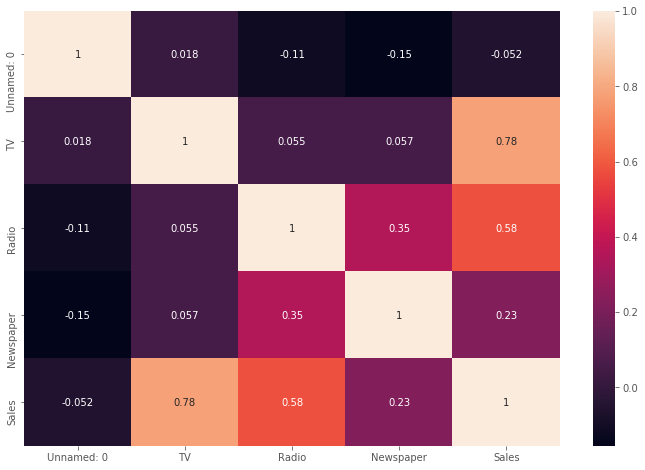

In [44]:
sns.heatmap(advert.corr(),annot=True)

# Feature Selection

In [45]:
from sklearn.metrics import r2_score

min_model2 = LinearRegression()
min_model2.fit(X[['TV',"Radio"]],y)
min_model2_pred = min_model2.predict(X[['TV','Radio']])
print("Score without Newspaper feature: ",r2_score(y,min_model2_pred))

Score without Newspaper feature:  0.8971942610828956


In [46]:
from sklearn.metrics import r2_score

min_model2 = LinearRegression()
min_model2.fit(X[['TV',"Radio",'Newspaper']],y)
min_model2_pred = min_model2.predict(X[['TV','Radio','Newspaper']])
print("Score with Newspaper feature: ",r2_score(y,min_model2_pred))

Score with Newspaper feature:  0.8972106381789522


# Model Evaluation using Train/Test Split and Metrics

In [47]:
from sklearn.model_selection import train_test_split
import sklearn

X = advert[['TV','Radio','Newspaper']]
y = advert['Sales']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 1)

In [49]:
lin_model3 = LinearRegression().fit(X_train,y_train)
lin_model3_pred = lin_model3.predict(X_test)

print("RMSE: ",np.sqrt(sklearn.metrics.mean_squared_error(y_test, lin_model3_pred)))
print("R^2 Score: ",r2_score(y_test,lin_model3_pred))

RMSE:  1.4046514230328955
R^2 Score:  0.9156213613792232


<h4>Let's use train/test split with RMSE to see whether newspaper should be kept in the model or not</h4>

In [50]:
X = advert[['TV','Radio']]
y = advert['Sales']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 1)

In [52]:
lin_model4 = LinearRegression().fit(X_train,y_train)
lin_model4_pred = lin_model4.predict(X_test)

print("RMSE: ",np.sqrt(sklearn.metrics.mean_squared_error(y_test, lin_model4_pred)))
print("R^2 Score: ",r2_score(y_test,lin_model4_pred))

RMSE:  1.3879034699382888
R^2 Score:  0.9176214942248908


# Interaction Effect(Synergy)

In [54]:
advert['Interaction'] = advert['TV'] * advert['Radio']
X = advert[['TV','Radio','Interaction']]
y = advert['Sales']
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 1)

In [55]:
lin_model5 = LinearRegression().fit(X_train,y_train)
lin_model5_pred = lin_model5.predict(X_test)

print("RMSE: ",np.sqrt(sklearn.metrics.mean_squared_error(y_test, lin_model5_pred)))
print("R^2 Score: ",r2_score(y_test,lin_model5_pred))

RMSE:  0.7011871137164326
R^2 Score:  0.9789736814681261


<h4>Synergy effect has drastically reduced RMSE and increased r2 score, which implies that, funds are to be distributed among both TV and Radio for better Sales</h4>